In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x = np.linspace(0,50,500)


In [0]:
y = np.cos(x)

In [49]:
x

array([ 0.        ,  0.1002004 ,  0.2004008 ,  0.3006012 ,  0.4008016 ,
        0.501002  ,  0.6012024 ,  0.70140281,  0.80160321,  0.90180361,
        1.00200401,  1.10220441,  1.20240481,  1.30260521,  1.40280561,
        1.50300601,  1.60320641,  1.70340681,  1.80360721,  1.90380762,
        2.00400802,  2.10420842,  2.20440882,  2.30460922,  2.40480962,
        2.50501002,  2.60521042,  2.70541082,  2.80561122,  2.90581162,
        3.00601202,  3.10621242,  3.20641283,  3.30661323,  3.40681363,
        3.50701403,  3.60721443,  3.70741483,  3.80761523,  3.90781563,
        4.00801603,  4.10821643,  4.20841683,  4.30861723,  4.40881764,
        4.50901804,  4.60921844,  4.70941884,  4.80961924,  4.90981964,
        5.01002004,  5.11022044,  5.21042084,  5.31062124,  5.41082164,
        5.51102204,  5.61122244,  5.71142285,  5.81162325,  5.91182365,
        6.01202405,  6.11222445,  6.21242485,  6.31262525,  6.41282565,
        6.51302605,  6.61322645,  6.71342685,  6.81362725,  6.91

In [50]:
y

array([ 1.        ,  0.99498414,  0.97998687,  0.95515865,  0.92074854,
        0.87710174,  0.82465609,  0.76393772,  0.69555574,  0.62019614,
        0.53861491,  0.45163044,  0.36011533,  0.26498765,  0.16720169,
        0.0677384 , -0.03240441, -0.13222216, -0.23071349, -0.32689036,
       -0.41978796, -0.50847437, -0.5920599 , -0.66970605, -0.74063389,
       -0.80413191, -0.85956309, -0.90637137, -0.94408719, -0.97233219,
       -0.99082302, -0.99937418, -0.99789991, -0.98641498, -0.9650346 ,
       -0.93397327, -0.89354257, -0.84414811, -0.78628538, -0.72053486,
       -0.64755613, -0.5680813 , -0.48290763, -0.39288957, -0.29893015,
       -0.20197195, -0.10298761, -0.00297014,  0.09707713,  0.19615055,
        0.29325624,  0.38742007,  0.47769741,  0.56318261,  0.64301813,
        0.71640307,  0.78260125,  0.84094859,  0.89085976,  0.93183408,
        0.9634605 ,  0.98542175,  0.99749752,  0.99956668,  0.99160845,
        0.97370269,  0.94602901,  0.90886503,  0.86258357,  0.80

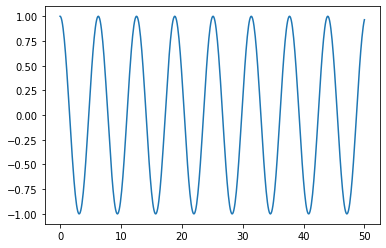

In [51]:
plt.plot(x,y)

In [0]:
data = pd.DataFrame(index=x,data=y,columns=['cosine'])

In [53]:
data.head()

,cosine
0.000000,1.000000
0.100200,0.994984
0.200401,0.979987
0.300601,0.955159
0.400802,0.920749


In [0]:
test_ind = 50

In [55]:
len(data)-test_ind

450

In [0]:
train = data.iloc[:450]

In [0]:
test = data.iloc[450:]

In [58]:
train.shape

(450, 1)

In [59]:
test.shape

(50, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
scal_train = scaler.fit_transform(train)

In [0]:
scal_test = scaler.transform(test)

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [0]:
length = 25
batch_size=1

In [0]:
generator = TimeseriesGenerator(scal_train,scal_train,length=length,batch_size=batch_size)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [0]:
n_feature = 1

In [0]:
model = Sequential()
model.add(SimpleRNN(40,input_shape=(length,n_feature)))
model.add(Dense(1))

In [0]:
model.compile(loss='mse',optimizer='adam')

In [71]:
model.fit_generator(generator,epochs=10)

Epoch 1/10
425/425 [==============================] - 4s 9ms/step - loss: 0.0155
Epoch 2/10
425/425 [==============================] - 3s 8ms/step - loss: 9.2622e-04
Epoch 3/10
425/425 [==============================] - 4s 8ms/step - loss: 1.9312e-04
Epoch 4/10
425/425 [==============================] - 4s 8ms/step - loss: 8.1978e-05
Epoch 5/10
425/425 [==============================] - 3s 8ms/step - loss: 7.7565e-04
Epoch 6/10
425/425 [==============================] - 3s 8ms/step - loss: 8.0060e-05
Epoch 7/10
425/425 [==============================] - 3s 8ms/step - loss: 2.3634e-05
Epoch 8/10
425/425 [==============================] - 3s 8ms/step - loss: 9.3973e-04
Epoch 9/10
425/425 [==============================] - 3s 8ms/step - loss: 3.6710e-05
Epoch 10/10
425/425 [==============================] - 3s 8ms/step - loss: 1.3315e-05


In [0]:
losses = pd.DataFrame(model.history.history)

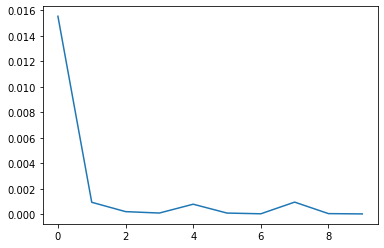

In [73]:
plt.plot(losses)

In [0]:
test_predictions = []

first_eval_batch = scal_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_feature))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [77]:
test_predictions

[array([0.7245493], dtype=float32),
 array([0.67846143], dtype=float32),
 array([0.6311724], dtype=float32),
 array([0.58226585], dtype=float32),
 array([0.531505], dtype=float32),
 array([0.48123085], dtype=float32),
 array([0.43018782], dtype=float32),
 array([0.37965566], dtype=float32),
 array([0.33056432], dtype=float32),
 array([0.28235555], dtype=float32),
 array([0.23687395], dtype=float32),
 array([0.19386008], dtype=float32),
 array([0.15381235], dtype=float32),
 array([0.11832979], dtype=float32),
 array([0.08599913], dtype=float32),
 array([0.05888546], dtype=float32),
 array([0.03685962], dtype=float32),
 array([0.01868277], dtype=float32),
 array([0.0071214], dtype=float32),
 array([-0.0001558], dtype=float32),
 array([-0.00254884], dtype=float32),
 array([0.0015619], dtype=float32),
 array([0.00884752], dtype=float32),
 array([0.02214183], dtype=float32),
 array([0.0400482], dtype=float32),
 array([0.0610433], dtype=float32),
 array([0.08823234], dtype=float32),
 array([

In [78]:
scal_test

array([[7.23275821e-01],
       [6.77403032e-01],
       [6.29750541e-01],
       [5.80796384e-01],
       [5.31031655e-01],
       [4.80955582e-01],
       [4.31070512e-01],
       [3.81876880e-01],
       [3.33868182e-01],
       [2.87526028e-01],
       [2.43315310e-01],
       [2.01679537e-01],
       [1.63036389e-01],
       [1.27773521e-01],
       [9.62446821e-02],
       [6.87661603e-02],
       [4.56136127e-02],
       [2.70192990e-02],
       [1.31697524e-02],
       [4.20390767e-03],
       [2.11707626e-04],
       [1.23320094e-03],
       [7.25814028e-03],
       [1.82260851e-02],
       [3.40270081e-02],
       [5.45023986e-02],
       [7.94468534e-02],
       [1.08610137e-01],
       [1.41699690e-01],
       [1.78383569e-01],
       [2.18293770e-01],
       [2.61029926e-01],
       [3.06163319e-01],
       [3.53241184e-01],
       [4.01791248e-01],
       [4.51326471e-01],
       [5.01349929e-01],
       [5.51359801e-01],
       [6.00854401e-01],
       [6.49337213e-01],


In [0]:
true_predictions = scaler.inverse_transform(test_predictions)

In [80]:
true_predictions

array([[ 0.44910345],
       [ 0.35692854],
       [ 0.26235134],
       [ 0.16453908],
       [ 0.06301824],
       [-0.03752914],
       [-0.1396143 ],
       [-0.24067774],
       [-0.33885955],
       [-0.43527624],
       [-0.52623863],
       [-0.61226561],
       [-0.69236037],
       [-0.76332486],
       [-0.82798561],
       [-0.88221249],
       [-0.92626377],
       [-0.96261715],
       [-0.98573967],
       [-1.00029395],
       [-1.00507999],
       [-0.99685859],
       [-0.98228748],
       [-0.95569909],
       [-0.91988666],
       [-0.87789683],
       [-0.82351924],
       [-0.76469118],
       [-0.69732367],
       [-0.62091357],
       [-0.54278205],
       [-0.45405941],
       [-0.3626773 ],
       [-0.26891292],
       [-0.16620901],
       [-0.06765056],
       [ 0.03609244],
       [ 0.14147586],
       [ 0.23957208],
       [ 0.34390838],
       [ 0.43931526],
       [ 0.5301188 ],
       [ 0.62225079],
       [ 0.69796543],
       [ 0.77444609],
       [ 0

In [81]:
test

,cosine
45.090180,0.446557
45.190381,0.354812
45.290581,0.259508
45.390782,0.161600
45.490982,0.062072
45.591182,-0.038080
45.691383,-0.137849
45.791583,-0.236235
45.891784,-0.332252
45.991984,-0.424935


In [82]:
test['prediction'] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
test

,cosine,prediction
45.090180,0.446557,0.449103
45.190381,0.354812,0.356929
45.290581,0.259508,0.262351
45.390782,0.161600,0.164539
45.490982,0.062072,0.063018
45.591182,-0.038080,-0.037529
45.691383,-0.137849,-0.139614
45.791583,-0.236235,-0.240678
45.891784,-0.332252,-0.338860
45.991984,-0.424935,-0.435276


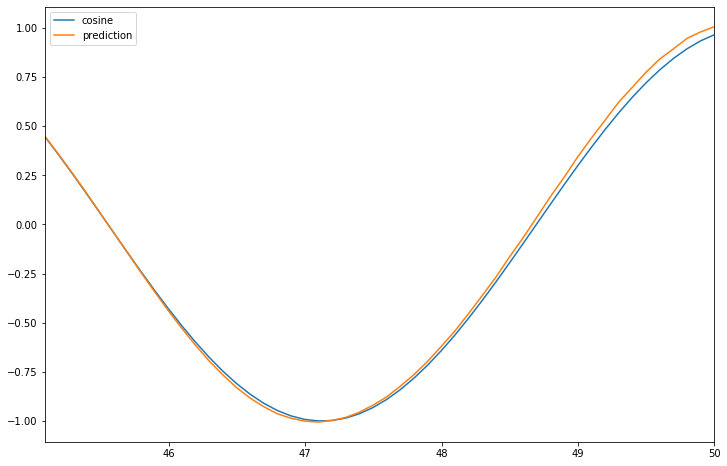

In [84]:
test.plot(figsize=(12,8))